<a href="https://colab.research.google.com/github/My1nonly/PCVK_smt6_2023/blob/main/leaf_disease_detection_using_cnn-FinalExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 allows you to mount your Google Drive storage within the Colab environment.

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# load some necessary package

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this will list all files under the input directory
# recursively visiting all subdirectories

import os                                                            #it allows to recursively traverse through the specified directory and print the absolute path of each file within that directory and its subdirectories.
for dirname, _, filenames in os.walk('/input/directory'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

The code snippet imports various libraries and modules needed for working with images and building neural networks using TensorFlow and Keras. By importing these libraries and modules, you can leverage their functionality to work with images, perform image processing tasks, and build neural network models for tasks such as image classification, object detection, and more.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

represents the directory path where your dataset of rice leaf disease images is stored

In [5]:
data_dir = '../content/drive/MyDrive/images/Rice Leaf Disease'

represents the directory path where your dataset is located.


In [6]:
data_dir

'../content/drive/MyDrive/images/Rice Leaf Disease'

represents a path to a file or directory on the file system

In [7]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('../content/drive/MyDrive/images/Rice Leaf Disease')

uses the glob method from the Path object to search for files matching a specific pattern within the data_dir directory.

In [8]:
list(data_dir.glob("*DSC*.jpg"))

[]

uses the glob method to search for files within the "Bacterial leaf blight" directory in the data_dir directory. there 40 images file

In [9]:
bacteria=list(data_dir.glob("Bacterial leaf blight/*"))
len(bacteria)

40

uses the Python Imaging Library (PIL) to open an image file specified by the path of the first element in the bacteria list.

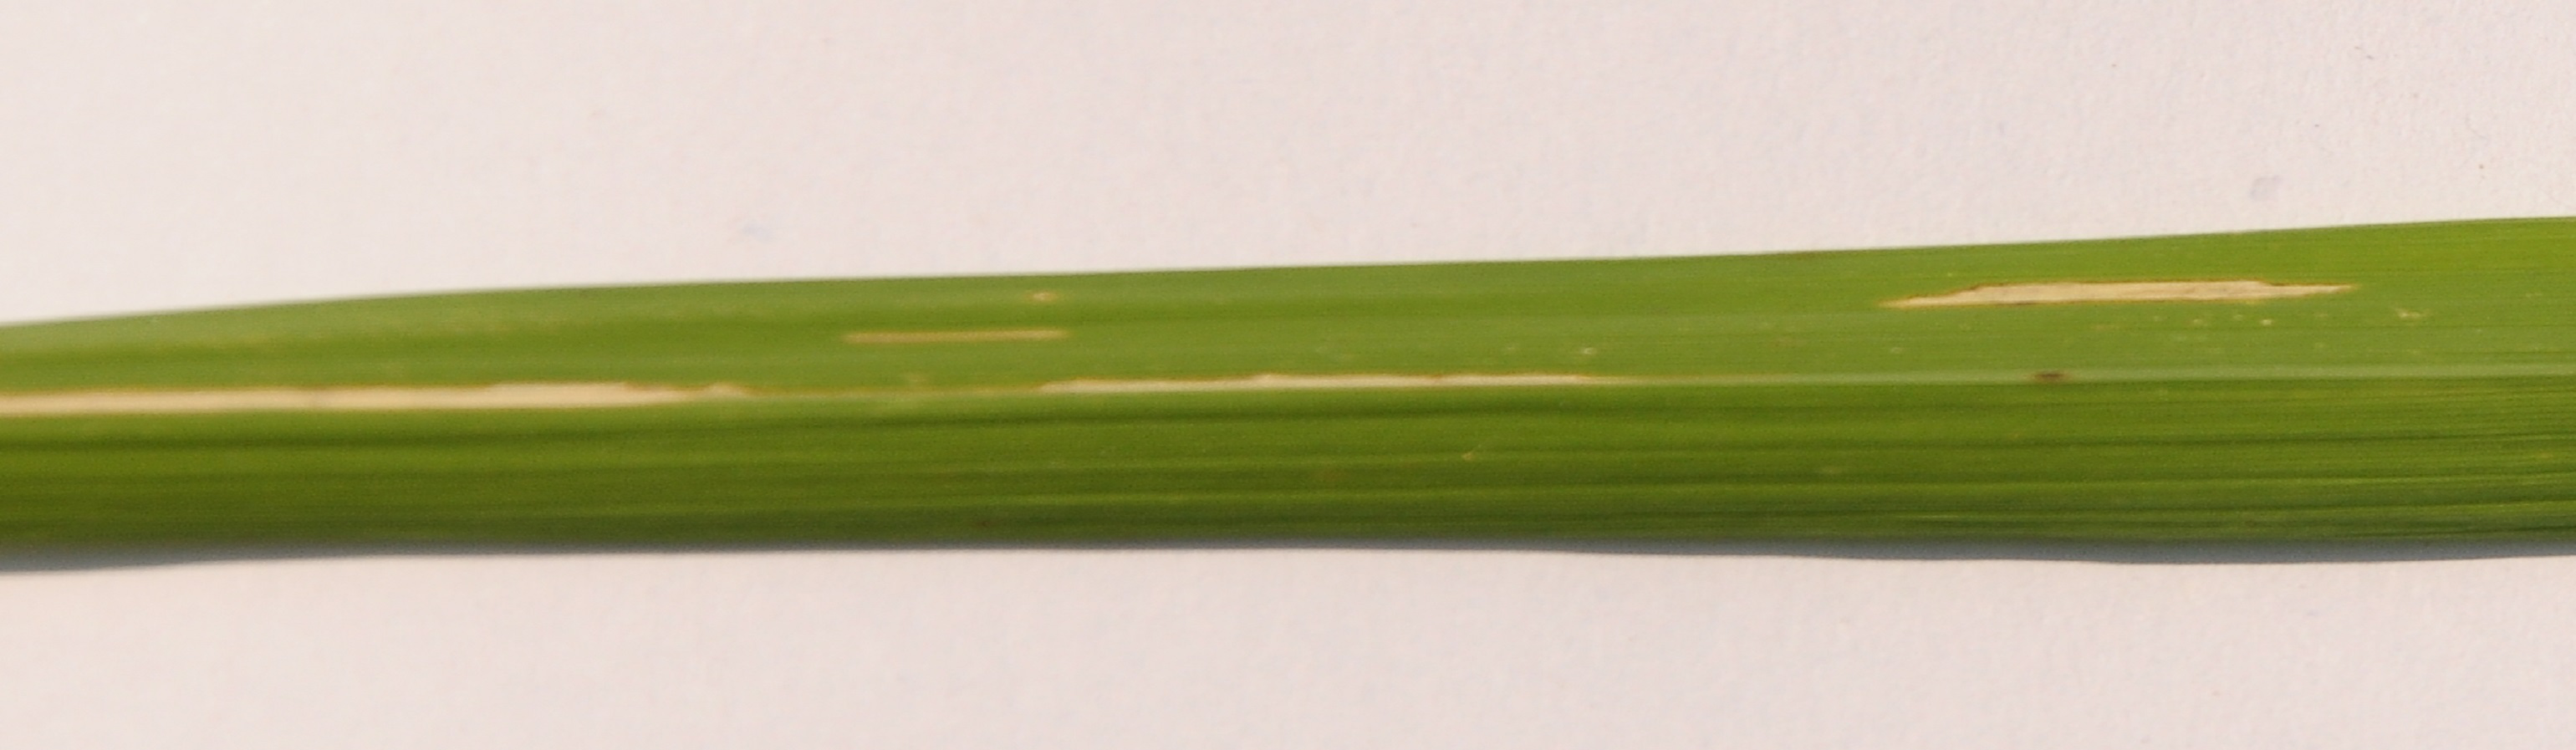

In [10]:
PIL.Image.open(str(bacteria[0]))

uses the glob method to search for files within the "Brown spot" directory in the data_dir directory. there are 40 images file

In [11]:
brown=list(data_dir.glob("Brown spot/*"))
len(brown)

40

it creates a dictionary called dict with three keys: "bacteria", "brown", and "smut".

In [12]:
dict={"bacteria":list(data_dir.glob("Bacterial leaf blight/*")),"brown":list(data_dir.glob("Brown spot/*")),"smut":list(data_dir.glob("Leaf smut/*"))}

 that maps class labels to numerical values.

In [13]:
labels_dict = {
    'bacteria': 0,
    'brown': 1,
    'smut': 2,

}

this converts the first element of the list associated with the key "smut" in the dict dictionary to a string representation.

In [14]:
str(dict["smut"][0])

'../content/drive/MyDrive/images/Rice Leaf Disease/Leaf smut/DSC_0508.jpg'

uses the OpenCV library to read an image file specified by the path of the first element in the list associated with the key "smut" in the dict dictionary.

In [15]:
img=cv2.imread(str((dict["smut"][0])))

this resizes the image img using the OpenCV cv2.resize() function and returns the shape of the resized image.

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []   # initialize two empty lists

for name, images in dict.items():
    for image in images:
        img = cv2.imread(str(image))               # read the images using cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))    # resizes the image to a size of (180,180)
        X.append(resized_img)                      # Appends the resized image (resized_img) to the X list.
        y.append(labels_dict[name])                # Appends the numerical label (labels_dict[name]) corresponding to the current key to the y list.

it retrieves the first five elements from the list y, which contains the labels corresponding to the images in the dataset.

In [18]:
y[:5]

[0, 0, 0, 0, 0]

convert the lists X and y into NumPy arrays, respectively.

In [19]:
X = np.array(X)
y = np.array(y)

Running the code will split the data into training and testing sets based on the specified ratio (by default, 75% for training and 25% for testing). The outputs show the shapes of the resulting arrays, indicating the number of samples and features in each set.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


returns the number of samples in the testing set, represented by the array X_test.

In [21]:
len(X_test)

30

perform scaling on the pixel values of the input images.

In [22]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

building and training a convolutional neural network (CNN) model using the Sequential API from the TensorFlow Keras library.

In [23]:
num_classes = 3
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 5s 892ms/step - loss: 1.5250 - accuracy: 0.3444
Epoch 2/30
3/3 [==============================] - 3s 894ms/step - loss: 1.3143 - accuracy: 0.3778
Epoch 3/30
3/3 [==============================] - 3s 859ms/step - loss: 1.0430 - accuracy: 0.4667
Epoch 4/30
3/3 [==============================] - 4s 1s/step - loss: 0.9513 - accuracy: 0.6333
Epoch 5/30
3/3 [==============================] - 4s 984ms/step - loss: 0.8836 - accuracy: 0.6444
Epoch 6/30
3/3 [==============================] - 3s 863ms/step - loss: 0.7932 - accuracy: 0.6778
Epoch 7/30
3/3 [==============================] - 3s 871ms/step - loss: 0.6947 - accuracy: 0.7444
Epoch 8/30
3/3 [==============================] - 3s 869ms/step - loss: 0.6556 - accuracy: 0.7778
Epoch 9/30
3/3 [==============================] - 5s 2s/step - loss: 0.5800 - accuracy: 0.7556
Epoch 10/30
3/3 [==============================] - 3s 913ms/step - loss: 0.4930 - accuracy: 0.8222
Epoch 11/30
3/3 [========

is used to evaluate the trained model on the test data. It calculates the loss value and any specified metrics for the given test data.

In [24]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 480ms/step - loss: 0.8247 - accuracy: 0.7333


[0.8247340321540833, 0.7333333492279053]

used to make predictions on the test data using the trained model. It takes the input test data (X_test_scaled) and returns the predicted values for each sample in the test set.

In [25]:
predictions = model.predict(X_test_scaled)
predictions

1/1 [==============================] - 0s 395ms/step


array([[  1.2486806 ,   3.361138  ,  -5.592744  ],
       [ -7.3810873 ,   4.0406537 ,   2.5131905 ],
       [-12.042775  ,   6.5000877 ,   3.6701267 ],
       [  6.1264105 ,  -3.1746252 ,  -3.3539524 ],
       [ -3.7028625 ,   2.0069962 ,   1.2384714 ],
       [  2.6068132 ,  -0.4702087 ,  -2.5652552 ],
       [  9.451766  ,  -6.507973  ,  -4.572261  ],
       [  9.192588  ,  -4.4854813 ,  -5.590935  ],
       [ -0.68646646,   4.3595614 ,  -5.013089  ],
       [ -1.027578  ,  -1.4844736 ,   1.1740865 ],
       [  3.454095  ,   0.6214333 ,  -4.750014  ],
       [  1.8221858 ,   0.55203724,  -3.296583  ],
       [  5.710372  ,   0.5451929 ,  -6.61113   ],
       [-16.255518  ,   6.697408  ,   7.2080398 ],
       [ -3.852465  ,   1.3377535 ,   1.8310043 ],
       [-24.105698  ,  26.610353  ,  -6.526088  ],
       [  2.7561264 ,  -0.02940829,  -3.2132573 ],
       [  4.7782083 ,   0.90621144,  -5.8187685 ],
       [ -1.7591604 ,   0.13357149,   0.7989986 ],
       [-19.788555  ,  12.00594

applies the softmax function to the predicted values for a single sample.

In [26]:
score = tf.nn.softmax(predictions[0])

Running the code will find the index of the maximum value in the score array, which corresponds to the predicted class with the highest probability. The output will display the index of the predicted class.

In [27]:
np.argmax(score)

1

is used to access the true label of the first sample in the test set.

In [28]:
y_test[0]

1

defines a data augmentation pipeline using the Sequential API in TensorFlow. Data augmentation is a technique used to artificially increase the size of the training dataset by applying various random transformations to the input data.

In [29]:
data_augmentation = keras.Sequential(
  [

    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomFlip("horizontal")
  ]
)

used to display an image without showing the axis and to visualize the first image in the dataset, respectively.

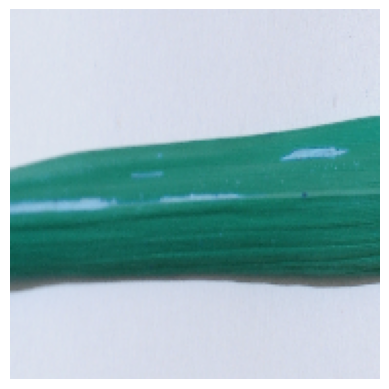

In [30]:
plt.axis('off')
plt.imshow(X[0])


this used to display an augmented version of the first image in the dataset without showing the axis.

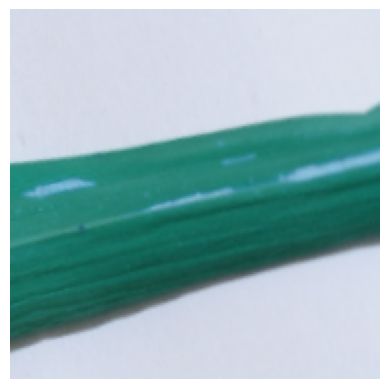

In [31]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

defines a new model architecture that includes data augmentation as a preprocessing step before the convolutional layers.Running the code will train the model using the augmented training data for 40 epochs. The model will be optimized using the Adam optimizer and will minimize the sparse categorical cross-entropy loss. The training progress will be printed after each epoch.

In [32]:
num_classes = 3

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=40)

Epoch 1/40
3/3 [==============================] - 6s 1s/step - loss: 1.5086 - accuracy: 0.3778
Epoch 2/40
3/3 [==============================] - 3s 1s/step - loss: 1.2183 - accuracy: 0.3111
Epoch 3/40
3/3 [==============================] - 4s 1s/step - loss: 1.1181 - accuracy: 0.3222
Epoch 4/40
3/3 [==============================] - 5s 1s/step - loss: 1.1057 - accuracy: 0.3556
Epoch 5/40
3/3 [==============================] - 3s 1s/step - loss: 1.0871 - accuracy: 0.4667
Epoch 6/40
3/3 [==============================] - 3s 1s/step - loss: 1.0895 - accuracy: 0.4556
Epoch 7/40
3/3 [==============================] - 4s 1s/step - loss: 1.0770 - accuracy: 0.4778
Epoch 8/40
3/3 [==============================] - 4s 1s/step - loss: 1.0568 - accuracy: 0.4111
Epoch 9/40
3/3 [==============================] - 3s 1s/step - loss: 1.0370 - accuracy: 0.5222
Epoch 10/40
3/3 [==============================] - 3s 1s/step - loss: 0.9693 - accuracy: 0.5111
Epoch 11/40
3/3 [==============================] 

is used to evaluate the trained model on the test dataset. It computes the loss value and metrics (in this case, accuracy) of the model on the provided test data. Running the code will evaluate the model on the scaled test data and print the test loss and test accuracy. The evaluation results provide insights into how well the model performs on unseen data.

In [33]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 433ms/step - loss: 0.5937 - accuracy: 0.7667


[0.5936607122421265, 0.7666666507720947]